In [2]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

# Basic audio features

- Code copied from: https://github.com/musikalkemist/AudioSignalProcessingForML
- Accompanying videos: https://www.youtube.com/watch?v=iCwMQJnKk2c&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0&ab_channel=ValerioVelardo-TheSoundofAI

## Loading audio files

In [3]:
normal_file = "assets/heart_sounds/normal.wav"

In [4]:
ipd.Audio(normal_file)

In [5]:
# load audio files with librosa
normal, sr = librosa.load(normal_file)

## Basic information regarding audio files

In [6]:
normal.shape

(441000,)

In [7]:
# total number of samples in audio file
tot_samples = len(normal)
tot_samples

441000

In [8]:
# duration of debussy audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 20.0 seconds


## Visualising audio signal in the time domain 

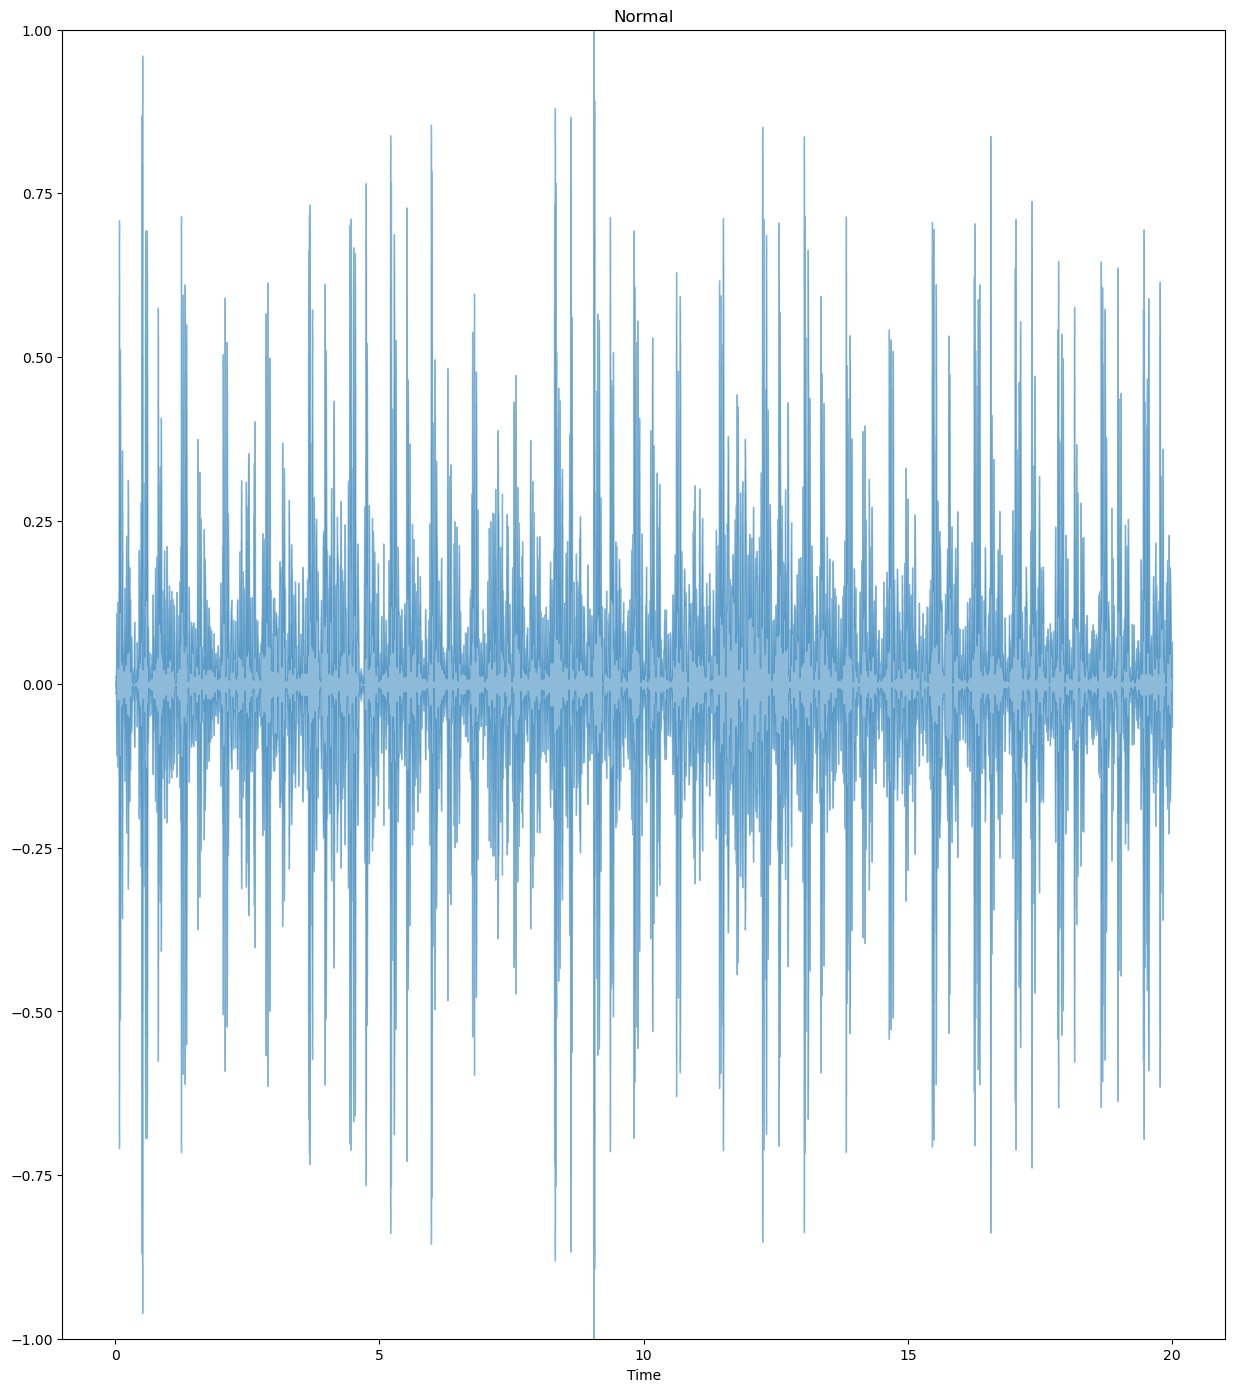

In [9]:
plt.figure(figsize=(15, 17))

plt.subplot(1, 1, 1)
librosa.display.waveshow(normal, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Normal")

plt.show()

## Calculating amplitude envelope

In [10]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [11]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [12]:
# number of frames in amplitude envelope
ae_normal = fancy_amplitude_envelope(normal, FRAME_SIZE, HOP_LENGTH)
len(ae_normal)

862

## Visualising amplitude envelope

In [13]:
frames = range(len(ae_normal))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

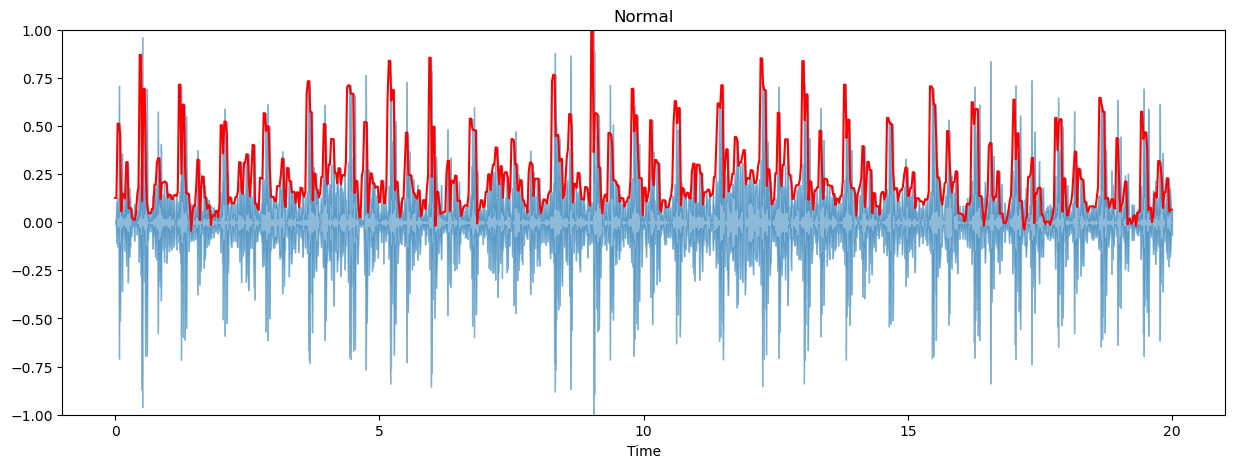

In [14]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(normal, alpha=0.5)
plt.plot(t, ae_normal, color="r")
plt.ylim((-1, 1))
plt.title("Normal")

plt.show()